<a href="https://colab.research.google.com/github/sayan0506/Product-Matching/blob/main/Product_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Matching Products with the Shelf goods using Yolov4 and image classification**

**Install dependencies**

In [4]:
# used for image augmentations
!pip install --upgrade imgaug
!pip install imagecorruptions

     |████████████████████████████████| 948 kB 4.1 MB/s 
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


     |████████████████████████████████| 2.1 MB 4.2 MB/s 


**Download the product dataset zipfile**

In [5]:
!wget https://storage.googleapis.com/metric-misc/infilect_dataset.zip

--2021-10-22 21:47:27--  https://storage.googleapis.com/metric-misc/infilect_dataset.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.188.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2164035919 (2.0G) [application/zip]
Saving to: ‘infilect_dataset.zip’

infilect_dataset.zi 100%[===================>]   2.01G  82.8MB/s    in 30s     

2021-10-22 21:47:58 (68.3 MB/s) - ‘infilect_dataset.zip’ saved [2164035919/2164035919]



**Unzip the dataset**

In [ ]:
!unzip /content/infilect_dataset.zip

## **Import Dependencies**

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

import os
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
import imgaug.augmenters as iaa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# this is an important module to use to serialize the image names in proper sorted order
from natsort import natsorted

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from tqdm import tqdm

**Mount the drive**

This contains yolov4 trained weights

id: hazrasayan2019@gmail.com

drive link: https://drive.google.com/drive/u/3/folders/1-5JMvg068iHX-BlH5jtUUKMtwHmUFwhC

In [8]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Data Preperation**


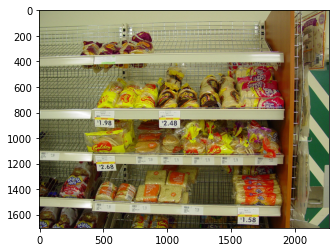

In [9]:
# sample shelf image
shelf_img_path = '/content/infilect_dataset/shelf_images/db1.jpg'
plt.imshow(plt.imread(shelf_img_path))

## **Object Detection using Yolov4**

Using the pretrained model from roboflow and my own fine-tuned one using product images

**Prepare yolov4 environment**

In [ ]:
!pwd

/content


In [ ]:
# clone Scaled_YOLOv4
!git clone https://github.com/roboflow-ai/ScaledYOLOv4.git # clone repo
%cd /content/ScaledYOLOv4
#checkout the yolov4-large branch
!git checkout yolov4-large

Cloning into 'ScaledYOLOv4'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 389.37 KiB | 3.27 MiB/s, done.
Resolving deltas: 100% (39/39), done.
/content/ScaledYOLOv4
Branch 'yolov4-large' set up to track remote branch 'yolov4-large' from 'origin'.
Switched to a new branch 'yolov4-large'


In [ ]:
#install mish activation function for cuda
%cd /content/
!git clone https://github.com/JunnYu/mish-cuda
%cd mish-cuda
!python setup.py build install

In [ ]:
# install pyYaml
!pip install -U PyYAML

     |████████████████████████████████| 596 kB 5.4 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


**Store the detected results**

Detected results are stored in same drive in the path '/content/drive/MyDrive/detected_shelf_objects'

In [ ]:
!python /content/ScaledYOLOv4/detect.py --weights /content/drive/MyDrive/yolov4/runs/exp6_yolov4-p5-results/weights/last_yolov4-p5-results_strip.pt --source /content/infilect_dataset/shelf_images --output /content/drive/MyDrive/detected_shelf_objects --img-size 896 --save-txt

## **Define the classification task**


In [ ]:
# this is an important module to use to serialize the image names in proper sorted order
from natsort import natsorted

**Load product images**

In [ ]:
# find product images
product_path = '/content/drive/MyDrive/product_images/'
# fetch product image list
img_list = natsorted(os.listdir(product_path))
print(img_list)

['qr1.jpg', 'qr2.jpg', 'qr3.jpg', 'qr4.jpg', 'qr5.jpg', 'qr6.jpg', 'qr7.jpg', 'qr8.jpg', 'qr9.jpg', 'qr10.jpg', 'qr11.jpg', 'qr12.jpg', 'qr13.jpg', 'qr14.jpg', 'qr15.jpg', 'qr16.jpg', 'qr17.jpg', 'qr18.jpg', 'qr19.jpg', 'qr20.jpg', 'qr21.jpg', 'qr22.jpg', 'qr23.jpg', 'qr24.jpg', 'qr25.jpg', 'qr26.jpg', 'qr27.jpg', 'qr28.jpg', 'qr29.jpg', 'qr30.jpg', 'qr31.jpg', 'qr32.jpg', 'qr33.jpg', 'qr34.jpg', 'qr35.jpg', 'qr36.jpg', 'qr37.jpg', 'qr38.jpg', 'qr39.jpg', 'qr40.jpg', 'qr41.jpg', 'qr42.jpg', 'qr43.jpg', 'qr44.jpg', 'qr45.jpg', 'qr46.jpg', 'qr47.jpg', 'qr48.jpg', 'qr49.jpg', 'qr50.jpg', 'qr51.jpg', 'qr52.jpg', 'qr53.jpg', 'qr54.jpg', 'qr55.jpg', 'qr56.jpg', 'qr57.jpg', 'qr58.jpg', 'qr59.jpg', 'qr60.jpg', 'qr61.jpg', 'qr62.jpg', 'qr63.jpg', 'qr64.jpg', 'qr65.jpg', 'qr66.jpg', 'qr67.jpg', 'qr68.jpg', 'qr69.jpg', 'qr70.jpg', 'qr71.jpg', 'qr72.jpg', 'qr73.jpg', 'qr74.jpg', 'qr75.jpg', 'qr76.jpg', 'qr77.jpg', 'qr78.jpg', 'qr79.jpg', 'qr80.jpg', 'qr81.jpg', 'qr82.jpg', 'qr83.jpg', 'qr84.jpg', 

#### **Define the dataset containing 100 categories**

Define the dataframe to load the images

In [ ]:
class_labels = [i for i in range(0,100)]
img_name = img_list[0]
cls_id = 0
img_df = pd.DataFrame(columns = ['img_path', 'cls_id'])
for img_id, img in enumerate(img_list):
  img_path = os.path.join(product_path, img)
  id = (int(img.split('.')[0].split('qr')[1]))
  if (id-1)!=0 and (id-1)%3==0:
    cls_id+=1
    img_df.loc[img_id, 'img_path'] = img_path
    img_df.loc[img_id, 'cls_id'] = str(class_labels[cls_id])

  else:
    img_df.loc[img_id, 'img_path'] = img_path
    img_df.loc[img_id, 'cls_id'] = str(class_labels[cls_id])

# print the dataset
img_df

,img_path,cls_id
0,/content/drive/MyDrive/product_images/qr1.jpg,0
1,/content/drive/MyDrive/product_images/qr2.jpg,0
2,/content/drive/MyDrive/product_images/qr3.jpg,0
3,/content/drive/MyDrive/product_images/qr4.jpg,1
4,/content/drive/MyDrive/product_images/qr5.jpg,1
...,...,...
295,/content/drive/MyDrive/product_images/qr296.jpg,98
296,/content/drive/MyDrive/product_images/qr297.jpg,98
297,/content/drive/MyDrive/product_images/qr298.jpg,99
298,/content/drive/MyDrive/product_images/qr299.jpg,99


## **Define Data Preperation**

**Define images and labels list**

Images are loaded to list by center-cropping to (1200,1200)

In [ ]:
#img_path_list = [plt.imread(path) for path in img_df['img_path']]
img_list = []
labels_list = []
# define cropped_dimension
(w,h) = (1200,1200)
for img_id_, path in enumerate(img_df['img_path']):
  img_ = plt.imread(path)
  center = [el/2 for el in img_.shape[:2]]
  #print(center)
  x = center[1] - w/2
  y = center[0] - h/2
  img_ = img_[int(y):int(y+h), int(x):int(x+w)]
  img_ = tf.keras.preprocessing.image.smart_resize(img_, size = (256,256), interpolation='bicubic')
  # this maintains(normalizes) the pixel values between 0 and 1
  img_-=img_.min()
  img_/=(img_.max()-img_.min())
  # append images in a list
  img_list.append(img_)
  labels_list.append(img_df['cls_id'][img_id_])

**Visualize images**

Visualize 30 sample images

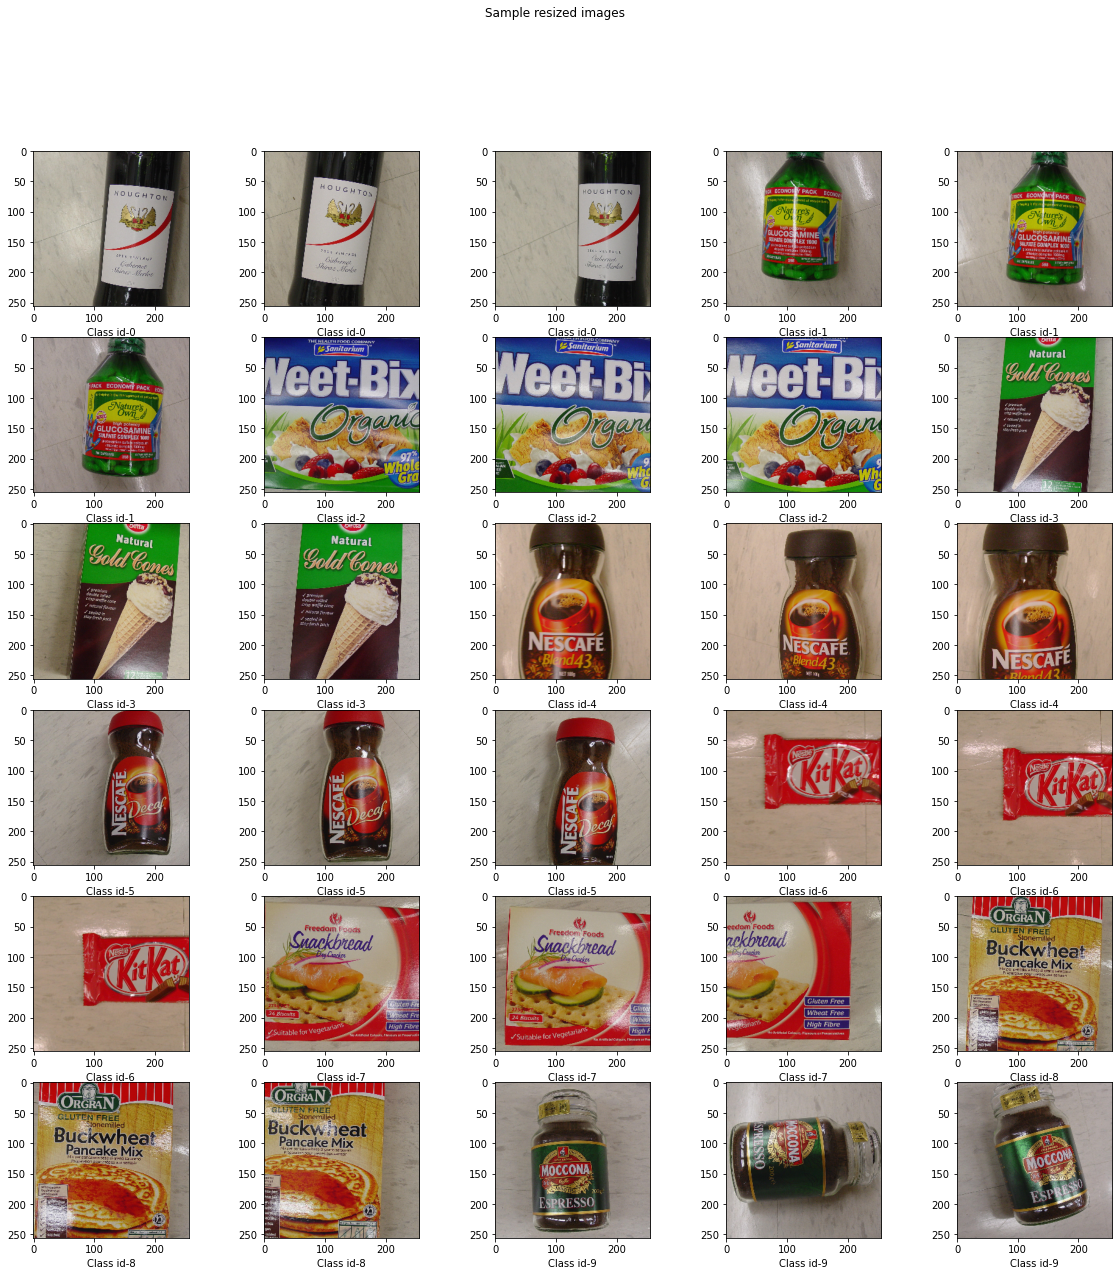

In [ ]:
# plot 30 sample images
fig = plt.figure(figsize=(20,20))
fig.suptitle('Sample resized images')
for i in range(30):
  fig.add_subplot(6,5,i+1)
  plt.imshow(img_list[i])
  plt.xlabel(f'Class id-{labels_list[i]}')

**Convert train image and labels to numpy array**

In [ ]:
img_array = np.array(img_list, dtype = np.float32)
label_array = np.array(labels_list, dtype = np.int32)

print(f'Dataset shape {img_array.shape, label_array.shape}')
print(f'Dataset dtype {img_array.dtype, label_array.dtype}')

Dataset shape ((300, 256, 256, 3), (300,))
Dataset dtype (dtype('float32'), dtype('int32'))


**Define data augmentation functions on the dataset**

For data augmentation we use image-augmentor module, where we utilized the following functionalities-

* Auto-contrast
* Auto-sharpness
* Auto-rotate(-10 t +10 deg)
* Auto-enhance color
* Auto equalize hist

1st apply all on ooriginal image, then applied all on rotated image, so we obtain 10 augmented samples

In [ ]:
def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    new_img
    return new_img

# image aug function for the dataset having the specified class index
def img_aug(dataset,label, class_idx = 0):
  # fetch the index of the given class idx
  idx_list = [i for i,j in enumerate(label) if j==class_idx]

  # define augmentor objects for auto_contrast, flip with prob=1
  auto_contrast = iaa.pillike.Autocontrast()
  # auto-brightness
  auto_brightness = iaa.imgcorruptlike.Brightness()
  # auto-sharpness
  sharpness = iaa.pillike.EnhanceSharpness()
  # auto-rotate
  rotate = iaa.Rotate(rotate = (-10,10), order=1)
  eq = iaa.pillike.Equalize()
  ec = iaa.pillike.EnhanceColor()

  img_list = list(dataset)

  # augmented images list initialized with dataset
  aug_list = img_list
  # augmented label list initiallized with dataset
  aug_label_list = list(label)
  
  for idx in idx_list:
    img = img_list[idx]
    
    # auto contrast
    img_con = convert(img,0,255,np.uint8)
    img_con = auto_contrast.augment_image(img_con)
    img_con = convert(img_con,0,1,np.float32)
    aug_list.append(img_con)
    aug_label_list.append(class_idx)
    
    # auto-brightness
    img_b = convert(img,0,255,np.uint8)
    img_b = auto_brightness.augment_image(img_b)
    img_b = convert(img_b,0,1,np.float32)
    aug_list.append(img_b)
    aug_label_list.append(class_idx)

    # auto-sharpness
    img_s = convert(img,0,255,np.uint8)
    img_s = sharpness.augment_image(img_s)
    img_s = convert(img_s,0,1,np.float32)
    aug_list.append(img_s)
    aug_label_list.append(class_idx)

    # auto-equalize
    img_eq = convert(img,0,255,np.uint8)
    img_eq = eq.augment_image(img_eq)
    img_eq = convert(img_eq,0,1,np.float32)
    aug_list.append(img_eq)
    aug_label_list.append(class_idx)

    # auto-enhance color
    img_ec = convert(img,0,255,np.uint8)
    img_ec = ec.augment_image(img_ec)
    img_ec = convert(img_ec,0,1,np.float32)
    aug_list.append(img_ec)
    aug_label_list.append(class_idx)

    # auto-rotate
    img_r = convert(img,0,255,np.uint8)
    img_r = rotate.augment_image(img_r)
    img_r = convert(img_r,0,1,np.float32)
    aug_list.append(img_r)
    aug_label_list.append(class_idx)

    # auto contrast
    img_con = convert(img_r,0,255,np.uint8)
    img_con = auto_contrast.augment_image(img_con)
    img_con = convert(img_con,0,1,np.float32)
    aug_list.append(img_con)
    aug_label_list.append(class_idx)
    
    # auto-brightness
    img_b = convert(img_r,0,255,np.uint8)
    img_b = auto_brightness.augment_image(img_b)
    img_b = convert(img_b,0,1,np.float32)
    aug_list.append(img_b)
    aug_label_list.append(class_idx)

    # auto-sharpness
    img_s = convert(img_r,0,255,np.uint8)
    img_s = sharpness.augment_image(img_s)
    img_s = convert(img_s,0,1,np.float32)
    aug_list.append(img_s)
    aug_label_list.append(class_idx)

    # auto-equalize
    img_eq = convert(img_r,0,255,np.uint8)
    img_eq = eq.augment_image(img_eq)
    img_eq = convert(img_eq,0,1,np.float32)
    aug_list.append(img_eq)
    aug_label_list.append(class_idx)

    # auto-enhance color
    img_ec = convert(img_r,0,255,np.uint8)
    img_ec = ec.augment_image(img_ec)
    img_ec = convert(img_ec,0,1,np.float32)
    aug_list.append(img_ec)
    aug_label_list.append(class_idx)

  aug_img_array = np.array(aug_list, dtype=np.float32)
  # normalize the values between 0 and 1
  aug_img_array = aug_img_array - aug_img_array.min()
  aug_label_list_array = np.array(aug_label_list, dtype=np.int32) 
  
  assert aug_img_array.shape[0] == aug_label_list_array.shape[0]
  
  return aug_img_array, aug_label_list_array

**Apply Data Augmentation**

In [ ]:
# obtain augmented image and labels pair for all the classes
for cls in class_labels:
  if cls==0:
    aug_img, aug_label = img_aug(img_array, label_array, class_idx=cls)
  else:
    aug_img, aug_label = img_aug(aug_img, aug_label, class_idx=cls)

In [ ]:
print(f'Augmented Dataset shape {aug_img.shape, aug_label.shape}')
print(f'Augmented dtype {aug_img.dtype, aug_label.dtype}')

Augmented Dataset shape ((3600, 256, 256, 3), (3600,))
Augmented dtype (dtype('float32'), dtype('int32'))


**Class-wise distribution**

In [ ]:
print(f'Total images correponding to individual categories after augmentation {list(aug_label).count(0)}')

Total images correponding to individual categories after augmentation 36


**Visualize augmented samples**

Here we plot augmented samples of category 1

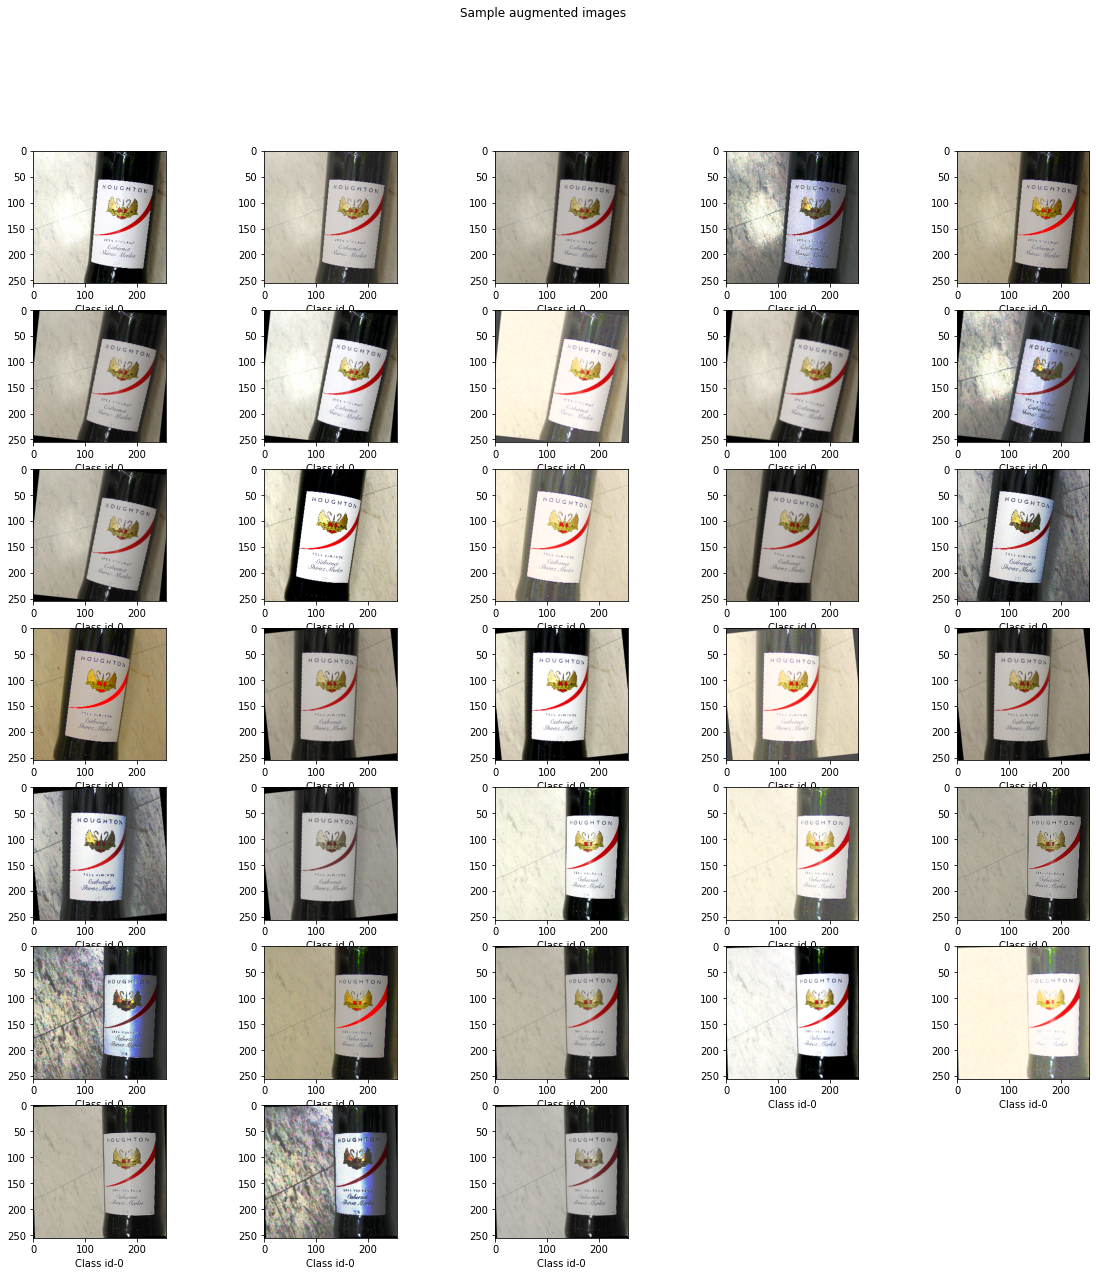

In [ ]:
# plot 30 sample images
fig = plt.figure(figsize=(20,20))
fig.suptitle('Sample augmented images')
for i in range(33):
  fig.add_subplot(7,5,i+1)
  plt.imshow(aug_img[300+i])
  plt.xlabel(f'Class id-{aug_label[300+i]}')

**Train validation split**

* As dataset is very small, we are considering only train and validation set with shuffling

* We have choosen test_ratio = 0.1665, for train and valid main i.e total 31 images are used for training for each class, rest will be for test single image, i.e. 1 image for validation and 1 image will be used for testing

In [ ]:
train_img, valid_main_img, train_label, valid_main_label = train_test_split(aug_img,
                                                                  aug_label,
                                                                  stratify = aug_label,
                                                                  test_size = 0.1665,
                                                                  shuffle = True,
                                                                  random_state = 42) 

valid_img, test_img, valid_label, test_label = train_test_split(valid_main_img,
                                                                  valid_main_label,
                                                                  stratify = valid_main_label,
                                                                  test_size = 0.5,
                                                                  shuffle = True,
                                                                  random_state = 42) 

In [ ]:
print(f'Train set dimension and datatype {train_img.shape, train_img.dtype, train_label.shape, train_label.dtype}')
print(f'Validation set dimension {valid_img.shape, valid_img.dtype, valid_label.shape, valid_label.dtype}')
print(f'Test set dimension and datatype {test_img.shape, test_img.dtype, test_label.shape, test_label.dtype}')


Train set dimension and datatype ((3000, 256, 256, 3), dtype('float32'), (3000,), dtype('int32'))
Validation set dimension ((300, 256, 256, 3), dtype('float32'), (300,), dtype('int32'))
Test set dimension and datatype ((300, 256, 256, 3), dtype('float32'), (300,), dtype('int32'))


## **Model Building**

We will use transfer learning on resnet50v2 trained on imagenet, where we will finetuning the added dense layer, and freeze the convolution base

In [10]:
def create_resnet50v2_model():
  conv_base = tf.keras.applications.ResNet50V2(
    include_top=False, 
    weights='imagenet', 
    input_shape=(256, 256, 3),
    pooling='avg'
  )
  
  model = Sequential()
  model.add(conv_base)
  model.add(Dense(100, activation='softmax'))

  return model

In [11]:
model = create_resnet50v2_model()

94683136/94668760 [==============================] - 1s 0us/step


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 100)               204900    
Total params: 23,769,700
Trainable params: 23,724,260
Non-trainable params: 45,440
_________________________________________________________________


**Define fine-tuning parameters**

here we are using fine-tuning, thus instead of freezing all the basae layers, unfreeze last two layers

In [13]:
# here we are freezing the base model
def freeze_model(model):
  for layer in model.layers:
    layer.trainable = False

In [14]:
conv_base = model.get_layer('resnet50v2')
#classifier = model.get_layer('dense_1')

# Freeze convolutional base
freeze_model(conv_base)
optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Unfreeze the last few layers of the convolutional base
#for layer in conv_base.layers:
##  if layer.name.startswith('conv5_block3') or layer.name.startswith('post'):
 #   layer.trainable = True

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 100)               204900    
Total params: 23,769,700
Trainable params: 204,900
Non-trainable params: 23,564,800
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


We can see in fine-tuning mode, only 204,900 are trainable

## **Model Training**

**Define function to plot training curves**

In [ ]:
# plot accuracy urve
def plot_accuracy_curves(history):  
  acc = history.history['acc']
  val_acc = history.history['val_acc']
 
  epochs = range(1, len(acc) + 1)
 
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

# plot loss curve
def plot_loss_curves(history): 

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(loss) + 1)

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()
def plot_curves(history): 
  plt.figure(figsize=(18,6))
  plt.subplot(1,2,1)
  plot_accuracy_curves(history)
  plt.subplot(1,2,2)
  plot_loss_curves(history)

**Model compile**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


**Define callbacks**

In [ ]:
mc_filepath = os.path.join('/content/drive/MyDrive', 'product_best_model.h5')
mcheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=mc_filepath, monitor='val_loss',verbose = 1, save_best_only=True, save_freq=375, mode ='min')

**Train the model**

In [ ]:
history = model.fit(x = train_img, y = train_label, batch_size= 16, epochs = 10, verbose=1, validation_data=(valid_img, valid_label), callbacks=[mcheckpoint])

Epoch 1/10
188/188 [==============================] - 64s 164ms/step - loss: 1.0231 - acc: 0.8450 - val_loss: 0.0919 - val_acc: 1.0000
Epoch 2/10
188/188 [==============================] - 27s 146ms/step - loss: 0.0439 - acc: 0.9987 - val_loss: 0.0376 - val_acc: 1.0000
Epoch 3/10
188/188 [==============================] - 28s 147ms/step - loss: 0.0185 - acc: 1.0000 - val_loss: 0.0219 - val_acc: 1.0000
Epoch 4/10
188/188 [==============================] - 28s 147ms/step - loss: 0.0107 - acc: 1.0000 - val_loss: 0.0157 - val_acc: 1.0000
Epoch 5/10
188/188 [==============================] - 28s 147ms/step - loss: 0.0071 - acc: 1.0000 - val_loss: 0.0117 - val_acc: 1.0000
Epoch 6/10
188/188 [==============================] - 28s 147ms/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.0090 - val_acc: 1.0000
Epoch 7/10
188/188 [==============================] - 28s 148ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 8/10
188/188 [==============================] - 2

**Plot training performance(not using logloss for live plot here)**

In [ ]:
# save trained model
model.save('/content/drive/MyDrive/product_best_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


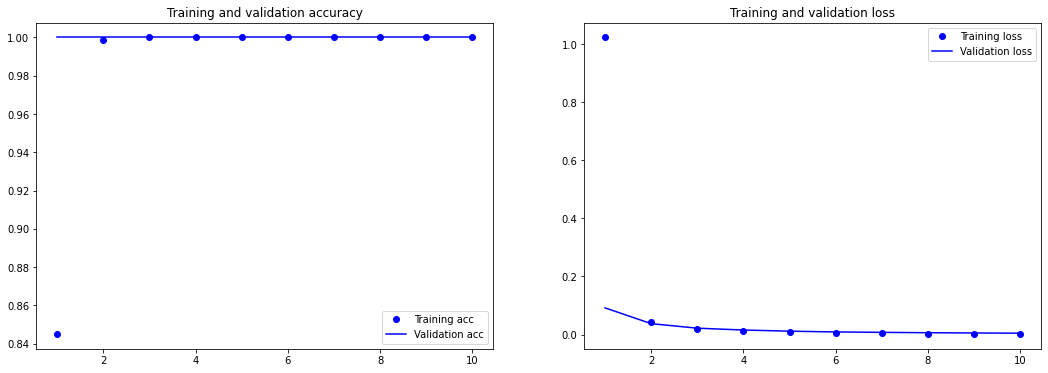

In [ ]:
plot_curves(history)

#### **Evaluate the model training**

In [ ]:
model.evaluate(test_img, test_label)

10/10 [==============================] - 4s 218ms/step - loss: 0.0078 - acc: 1.0000


[0.007801791653037071, 1.0]

**Model testing**

In [ ]:
test_pred = model.predict(test_img)
test_pred = np.argmax(test_pred, 1)
print(test_pred)

[32 84 93 50 44 94 17 99 63 46 53 89 96 84 10  5 52 90 56 16 47 88 70 74
 90 88  8 87 66 64 89 24 23 91 69 75  9 71 19 13 30 27 79 98 79 72 76 85
 37 88 11 25 36 54 33 19 52 38 25 80 46 21 46 50  0 29 28  7 29  3 16 60
 43 38  3 12 54 44 57 62 80 69  6  6 55 34 42 72 51 82 61 45 47 95 33 55
 18 74 93 77 35 26 52 41 72 27 91 45 39 42 62 49 13 10 54 71  2 18  7 80
 41 40 20 90 65  1 92 95 70 73 10 65 49 19 21 63 92 33 13 27 61 62 58 68
 73 56 48 58 22 94 22 67  4 48 77 14 92 28  5 96 59 39  4 57 12  5 91 81
 81  0  2 81 60 77 97 36 43 67  9  4 65 42 66 59 32 37 78 70 11 66 86 71
 15 20 35 31 18 40 15  8 24 75 14 99 58 85 15 29  3 97 99 23 49  7 74 56
 30 69  1  6 48 87 40 20 59 53 30 51 76 31 64  8 85 93 34 43  2 47 94 87
 96 26 60 50 36 38 67 79 14 78 41 98 64 17  1 97 22 61 45 44 26 98 35 82
  9 55 82 32 75 83 63 34 24 21 76 68 84 37 83 73 78 17 89 86 39 53 83 51
 12 23 31 11 95 86 68 57 16  0 25 28]


**Plot classification report and confusion matrix**

Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
     

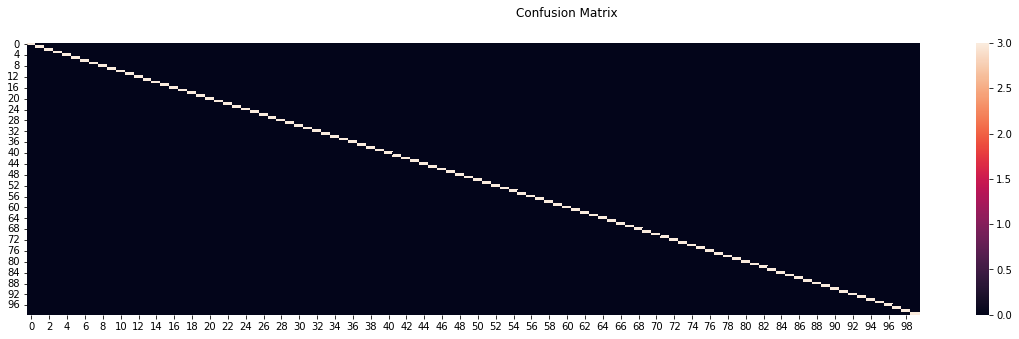

In [ ]:
print(f'Classification report {metrics.classification_report(test_label, test_pred)}')

fig_cm = plt.figure(figsize=(20,5))
fig_cm.suptitle('Confusion Matrix')
sns.heatmap(confusion_matrix(test_label, test_pred))

## **Detect products from shelfs**

In [18]:
txt_path = '/content/drive/MyDrive/detected_shelf_objects'

# fetch list of text files
# natsorted keeps the original file serial number instead of default conversion
txt_files = [file_ for file_ in natsorted(os.listdir(txt_path)) if file_.endswith('.txt')]

img_path = '/content/infilect_dataset/shelf_images'
# fetch images
img_files = [file_ for file_ in natsorted(os.listdir(img_path)) if file_.endswith('.jpg')]


In [19]:
print(f'Total detected text files available - {len(txt_files)}')
print(f'Total img files files available - {len(img_files)}')

Total detected text files available - 2481
Total img files files available - 3153


**Load the classififcation model**

Before loading must compile the model

In [15]:
# weight path
weight_file = '/content/drive/MyDrive/product_best_model.h5'
model.load_weights(weight_file)

Function to create line for solution 1

In [16]:
def form_line(id1, id2, x_min, y_min, x_max, y_max):
  line = str(id1)+', '+str(id2)+', '+str(x_min)+', '+str(y_min)+', '+str(x_max)+', '+str(y_max)+ '\n'
  return line

**Detect products from shelf**

In [20]:
# define lines string for solution 1
lines_1 = ''
# define lines string for solution 2
lines_2 = ''

for txt in tqdm(txt_files):
  id = txt.split('.txt')[0]
  demo_txt = os.path.join(txt_path, txt_files[1])
  demo_img = os.path.join(img_path, id+'.jpg')
  
  img_shape = np.flip(np.array(plt.imread(demo_img).shape[:2]))
  #print(img_shape)
  img = plt.imread(demo_img)

  with open(demo_txt, 'r') as demo:
    for line in demo.readlines():
      (x_,y_,w_,h_) = line.split()[1:]
      # x, y, w, h are obtained from deteted record
      x = int(float(x_)*float(img_shape[0]))
      y = int(float(y_)*float(img_shape[1]))
      w = int(float(w_)*float(img_shape[0]))
      h = int(float(h_)*float(img_shape[1]))
      
      # x_min, y_min (top left corner of image)
      x1 = int(x - (w/2))
      y1 = int(y - (h/2))
      # as in image the dimension is flipped i.e y:x
      img_ = np.array(img[y1:y1+h, x1:x1+w])

      # resize image to (1, 256,256, 3)
      img_res = tf.keras.preprocessing.image.smart_resize(img_, size = (256,256), interpolation='bicubic')
      img_res = img_res - img_res.min()
      img_res = img_res/(img_res.max() - img_res.min())
      img_res = np.expand_dims(img_res, axis = 0)
      
      # define model prediction
      y_pred = model.predict(img_res)
      y_pred = np.argmax(y_pred, 1)
      
      # evaluate box parameters
      x_min = x1
      y_min = y1
      x_max = x1 + w
      y_max = y1 + h
      
      # fetches the serial no of shelf image
      id_key = id.split('db')[1] 
      #print(id_key)
      # line for soln1, where input is product image
      lines_1 += form_line(y_pred[0], id_key, x_min, y_min, x_max, y_max)
      # here input is only shelf image
      lines_2 += form_line(id_key, y_pred[0], x_min, y_min, x_max, y_max)
    
#plt.imshow(plt.imread(demo_img))

100%|██████████| 2481/2481 [16:19<00:00,  2.53it/s]


**Write the solutions1.txt**

In [21]:
soln_1_path = os.path.join('/content/drive/MyDrive','solution_1.txt')
if not os.path.isfile(soln_1_path):
  f_1 = open(soln_1_path, 'x')
  f_1.close()

with open(soln_1_path, 'w') as s1:
  s1.write(lines_1)

**Write the solutions2.txt**

In [22]:
soln_2_path = os.path.join('/content/drive/MyDrive','solution_2.txt')
if not os.path.isfile(soln_2_path):
  f_2 = open(soln_2_path, 'x')
  f_2.close()

with open(soln_2_path, 'w') as s2:
  s2.write(lines_2)